In [1]:
import ultron
import pandas as pd
from atom_wrapper.atomwrapper import AtomWrapper
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
bbg = AtomWrapper()

In [2]:
tags = ultron.edf_get_tag_descriptions()

In [58]:
sofers = ultron.edf_get_analytics_story(start_date='2019-01-01', end_date='2021-05-01', tags=['SECONDBA'])

Found 19503 article(s)
{'query': {'bool': {'filter': [{'range': {'ts_update': {'gte': datetime.datetime(2019, 1, 1, 0, 0),
                                                        'lt': datetime.datetime(2021, 5, 1, 0, 0)}}}],
                    'must': [{'match': {'event_type': 'analytic'}},
                             {'bool': {'minimum_should_match': 1,
                                       'should': [{'match': {'parsed_DerivedTopics.Id': 'SECONDBA'}}]}}]}}}


In [64]:
NUM_DAYS_FROM_NOW = 31

In [65]:
ofrs = ultron.edf_analytics_story_get_ticker_sentiment(sofers)
ofrs = ofrs[~ofrs.ticker.str.contains("@")]
ofrs.set_index('utc_time', inplace=True)
ofrs = ofrs[ofrs['ticker'].shift(-1)!=ofrs['ticker']]
ofrs = ofrs[ofrs.index<pd.to_datetime(datetime.date.today(), utc=True)-pd.Timedelta(days=NUM_DAYS_FROM_NOW)]
ofrs = ofrs[ofrs.ticker.apply(lambda x: not any([str.isdigit(y) for y in x]))]

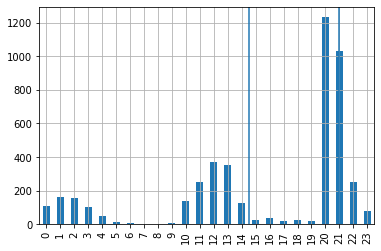

In [66]:
ofrs.index.hour.value_counts().sort_index().plot(kind='bar')
plt.axvline(12+2.5)
plt.axvline(12+9)

### We see the effects of a secondary offering visually then statistically.

In [75]:
ofrs[ofrs.suid == ofrs.suid.value_counts().index[0]]

,ticker,sentiment,headline,suid,analytics_type
utc_time,,,,,
2019-06-11 03:06:08.017000+00:00,NDAQ,0.000717,Alibaba’s Hong Kong Share Offering Should Worr...,PSWZA76JTSEC,MMN
2019-06-11 03:06:08.017000+00:00,BABA,0.000841,Alibaba’s Hong Kong Share Offering Should Worr...,PSWZA76JTSEC,MMN
2019-06-11 03:06:08.017000+00:00,DOYU,0.000717,Alibaba’s Hong Kong Share Offering Should Worr...,PSWZA76JTSEC,MMN
2019-06-11 03:06:08.017000+00:00,NDAQ,0.008052,Alibaba’s Hong Kong Share Offering Should Worr...,PSWZA76JTSEC,MMN_1STPASS
2019-06-11 03:06:08.017000+00:00,BABA,0.008052,Alibaba’s Hong Kong Share Offering Should Worr...,PSWZA76JTSEC,MMN_1STPASS
2019-06-11 03:06:08.017000+00:00,DOYU,0.008052,Alibaba’s Hong Kong Share Offering Should Worr...,PSWZA76JTSEC,MMN_1STPASS
2019-06-11 03:06:08.022000+00:00,BABA,0.008681,Alibaba’s Hong Kong Share Offering Should Worr...,PSWZA76JTSEC,MMN
2019-06-11 03:06:08.022000+00:00,DOYU,0.008681,Alibaba’s Hong Kong Share Offering Should Worr...,PSWZA76JTSEC,MMN
2019-06-11 03:06:08.022000+00:00,NDAQ,0.008681,Alibaba’s Hong Kong Share Offering Should Worr...,PSWZA76JTSEC,MMN


In [9]:
ofrs.ticker

utc_time
2019-01-04 11:22:45.805000+00:00         DLR
2019-01-08 12:33:21.045000+00:00         NLY
2019-01-08 14:09:29.181000+00:00        LOXO
2019-01-08 14:09:29.181000+00:00         BLK
2019-01-08 14:09:29.181000+00:00        LOXO
                                      ...   
2020-12-17 21:19:24.100000+00:00        EGLE
2020-12-17 22:01:28.166000+00:00    1515963D
2020-12-17 22:01:28.167000+00:00        SPCE
2020-12-18 12:14:13.617000+00:00        VTGN
2020-12-18 13:13:08.325000+00:00        ASUR
Name: ticker, Length: 4720, dtype: object